In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df=pd.read_excel("CP_전처리 작업.xlsx",sheet_name=1,dtype = {'GMFCS_Level': str})
df=df.fillna("")

In [187]:
df.columns

Index(['No', '성별', '등급', 'GMFCS_Level', '생리학적분류', '해부학적분류', '설문1', '휠체어 사용기간',
       '설문1연도', '설문1_1', '설문2', '자세보조용구 사용기간', '설문2연도', '설문2_1', '사용중인 보조기기',
       '휠체어', '전동휠체어', '유모차형 휠체어', '이너', '워커', '발 보조기', '스탠더', '피더시트', '카시트',
       '다리 보조기', '목욕의자', '신발보조기', '기타'],
      dtype='object')

In [188]:
df1=df[['GMFCS_Level','휠체어', '전동휠체어', '유모차형 휠체어', '이너', '워커', '발 보조기', '스탠더', '피더시트', '카시트',
       '다리 보조기', '목욕의자', '신발보조기', '기타']]
df1.head()

,GMFCS_Level,휠체어,전동휠체어,유모차형 휠체어,이너,워커,발 보조기,스탠더,피더시트,카시트,다리 보조기,목욕의자,신발보조기,기타
0,4,휠체어,전동휠체어,,,,,,,,,,,
1,3,휠체어,,,,워커,,,,,,,,
2,5,휠체어,,유모차형 휠체어,이너,워커,발 보조기(발목),스탠더,,,,,,휠체어 의자
3,5,휠체어,,유모차형 휠체어,이너,,발 보조기(발목),,,,,,,
4,5,,,,,,발 보조기(발목),,,,,,신발보조기(정형구두),척추 보조기


In [189]:
# 환자 일련번호가 붙은 상태로 사용하는 보조기기를 한 칼럼에 중복나열
df2=[]
for j in range(0,len(df1)):
    for i in range(1,len(df1.columns)-1):
        if df1.iloc[j,i]!="":
            df2.append({"일련번호":j, "GMFCS_Level": df1.iloc[j,0],"사용중인보조기기" : df1.iloc[j,i]})

In [204]:
df3=pd.DataFrame(df2)
df3.to_excel("GMFCS_Level별 사용중인보조기기.xlsx")

In [214]:
df4=df3.drop(['일련번호'],axis=1)
df4.head()

,GMFCS_Level,사용중인보조기기
0,4,휠체어
1,4,전동휠체어
2,3,휠체어
3,3,워커
4,5,휠체어


In [215]:
df5=df4.pivot_table(index='사용중인보조기기', columns='GMFCS_Level', 
                        aggfunc=len, fill_value=0)
df5.head()

GMFCS_Level,3,4,5
사용중인보조기기,,,
다리 보조기,3,0,3
목욕의자,0,0,8
발 보조기,0,3,32
발 보조기(단하지),0,1,0
발 보조기(발목),3,7,20


In [ ]:
plt.rc('font', family = 'NanumGothic')

No handles with labels found to put in legend.


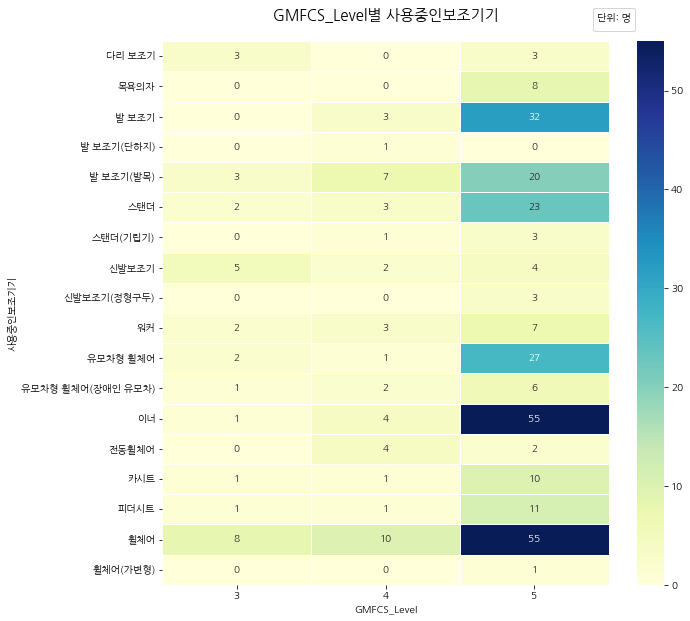

In [267]:
plt.figure(figsize = (10,10))
sns.heatmap(df5, annot=True, 
           linewidths=.5, cmap='YlGnBu')
plt.title('GMFCS_Level별 사용중인보조기기',fontsize=15,y=1.03)
plt.legend(title="단위: 명",loc='upper right', bbox_to_anchor=(1.07, 1.07),fontsize=10)
#plt.show() #얘 하고 나면 저장이 안돼
#plt.savefig('GMFCS_Level별 사용중인보조기기.jpg', dpi=600) # 그래프 파일로 출력하기, 이 함수 이전에 plt.show 하면 빈 화면 출력되니 주의

---

In [190]:
df4=df3.set_index('GMFCS_Level')
df4.tail(10)

,일련번호,사용중인보조기기
GMFCS_Level,,
5,147,이너
5,147,스탠더(기립기)
5,148,휠체어
5,148,전동휠체어
5,148,이너
4,149,워커
4,150,휠체어
4,151,전동휠체어
4,151,발 보조기(단하지)


In [191]:
df4 = df3.sort_values(by=['GMFCS_Level'], ascending=True)

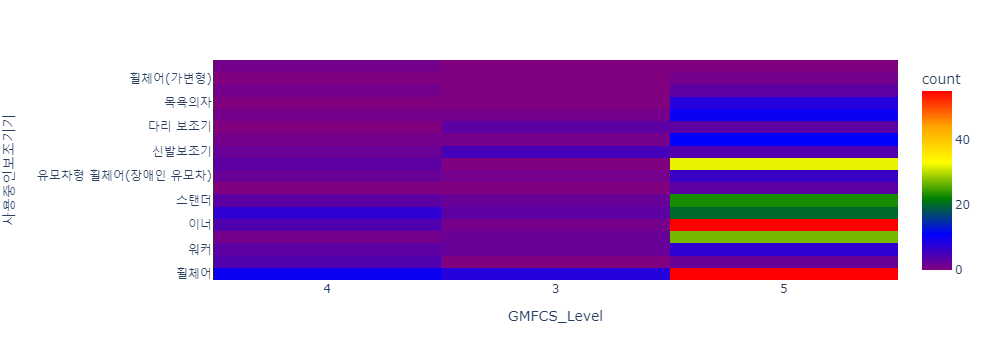

In [208]:
import plotly.express as px

fig = px.density_heatmap(df3, x="GMFCS_Level", y="사용중인보조기기",
    color_continuous_scale= [(0,"purple"), (0.2,"blue"),(0.4,"green"),(0.6,"yellow"),(0.8,"orange"),(1,"red")]  )
fig.show()

---

In [250]:
df6=pd.read_excel("CP_전처리 작업2.xlsx",sheet_name=5)
df7=df6[['GMFCS_Level',"통합"]]
df7.head()

,GMFCS_Level,통합
0,4,전동휠체어/휠체어
1,3,워커/휠체어
2,5,스탠더/발 보조기(발목)/워커/이너/유모차형 휠체어/휠체어
3,5,발 보조기(발목)/이너/유모차형 휠체어/휠체어
4,5,신발보조기(정형구두)/발 보조기(발목)


In [251]:
df8=df7.pivot_table(index='통합', columns='GMFCS_Level', 
                        aggfunc=len, fill_value=0)
df8.head()

GMFCS_Level,3,4,5
통합,,,
다리 보조기,3,0,0
다리 보조기/이너/휠체어,0,0,2
다리 보조기/휠체어,0,0,1
목욕의자/발 보조기/유모차형 휠체어(장애인 유모차),0,0,1
목욕의자/발 보조기/이너/유모차형 휠체어,0,0,1


In [252]:
plt.rc('font', family = 'NanumGothic')

No handles with labels found to put in legend.


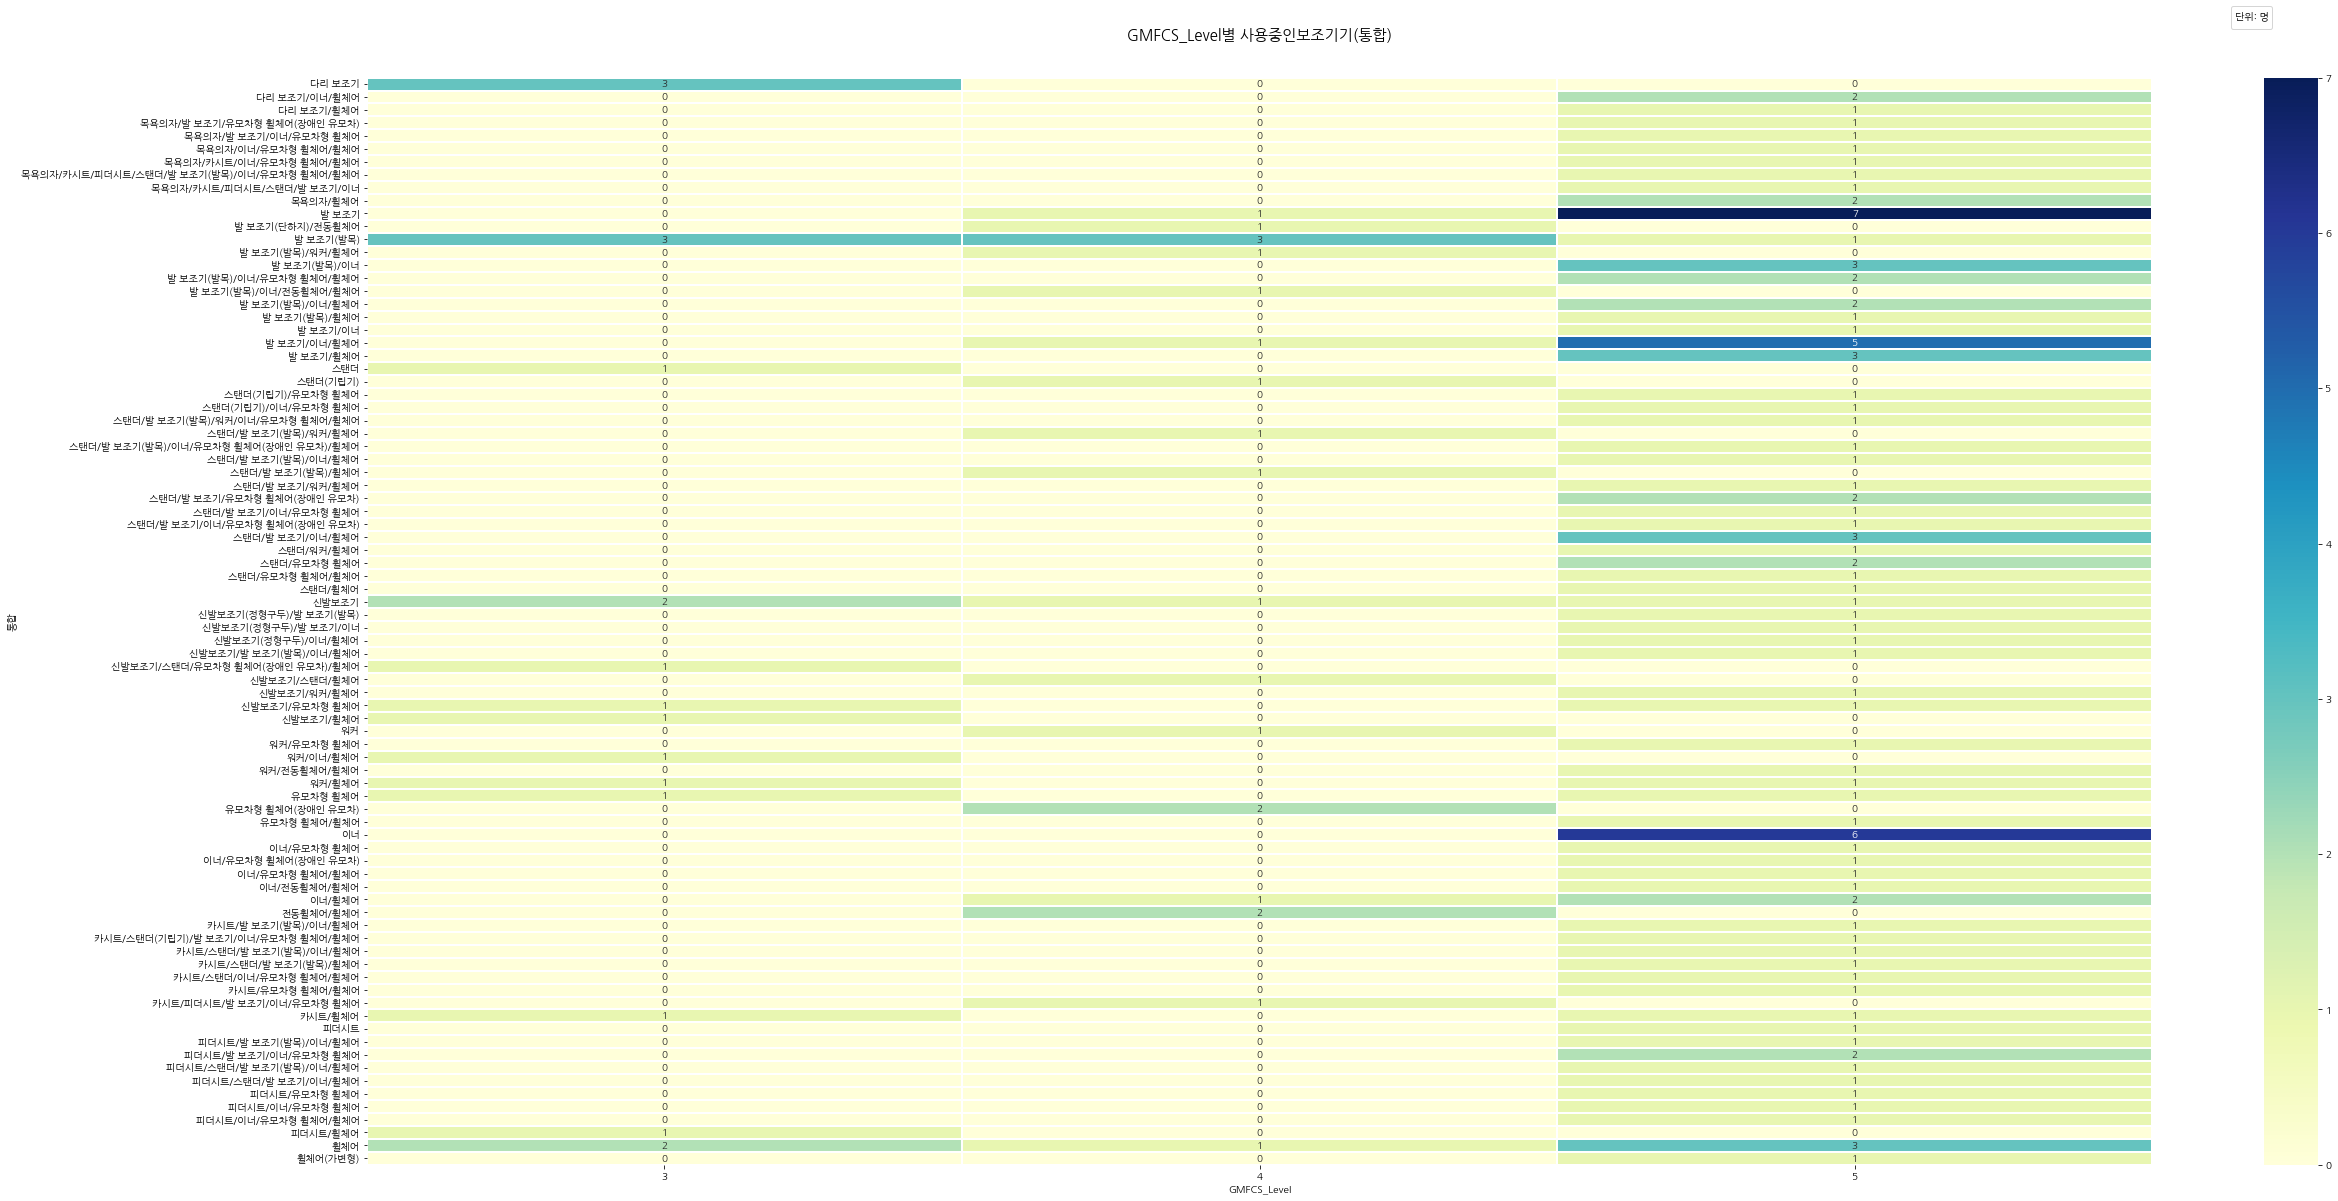

In [274]:
plt.figure(figsize = (40,20))
sns.heatmap(df8, annot=True, 
           linewidths=2, cmap='YlGnBu')
plt.title('GMFCS_Level별 사용중인보조기기(통합)',fontsize=15,y=1.03)
#plt.show() #얘 하면 저장이 하얗게 됨 
#plt.savefig('GMFCS_Level별 사용중인보조기기(통합).jpg', dpi=1000) # 그래프 파일로 출력하기, 이 함수 이전에 plt.show 하면 빈 화면 출력되니 주의